In [1]:
import os 
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir("D:/credit suisse")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.signal import lfilter

In [4]:
df1=pd.read_csv('HCLTECH.NS.csv')
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-04-04,387.450012,388.299988,369.649994,372.750000,330.662018,3285122.0
1,2013-04-05,371.125000,382.399994,371.125000,378.475006,335.740631,2671716.0
2,2013-04-08,378.475006,383.500000,370.549988,372.674988,330.595459,1505430.0
3,2013-04-09,375.625000,377.399994,369.299988,370.250000,328.444275,2253782.0
4,2013-04-10,371.000000,385.875000,368.250000,382.500000,339.311157,1898240.0
5,2013-04-11,384.899994,396.850006,383.500000,395.350006,350.710175,2612044.0
6,2013-04-12,379.500000,390.649994,379.375000,388.049988,344.234406,4798608.0
7,2013-04-15,387.500000,392.000000,381.625000,382.475006,339.288910,4912316.0
8,2013-04-16,379.950012,385.225006,378.850006,381.399994,338.335327,3669770.0
9,2013-04-17,402.600006,405.000000,372.524994,375.649994,333.234497,14111174.0


In [5]:
df1.shape

(1232, 7)

In [6]:
df1.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [7]:
df1['Date']=pd.to_datetime(df1['Date'])

In [8]:
df1.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [9]:
df1.fillna(df1.mean(),inplace=True)

In [10]:
close_zero=df1.iloc[-1].Close

In [11]:
df1['HL_PCT'] = (df1['High'] - df1['Low'])/(df1['Low']*100)

In [12]:
df1['PCT_CHNG_OpCl'] = (df1['Close'] - df1['Open'])/(df1['Open']*100)

In [13]:
df1['PCT_CHNG_CLOSE'] = (df1['Close'] - df1['Adj Close'])/(df1['Adj Close']*100)

In [14]:
df1.index=df1['Date']

In [15]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE
Date,,,,,,,,,,
2013-04-04,2013-04-04,387.450012,388.299988,369.649994,372.750000,330.662018,3285122.0,0.000505,-0.000379,0.001273
2013-04-05,2013-04-05,371.125000,382.399994,371.125000,378.475006,335.740631,2671716.0,0.000304,0.000198,0.001273
2013-04-08,2013-04-08,378.475006,383.500000,370.549988,372.674988,330.595459,1505430.0,0.000349,-0.000153,0.001273
2013-04-09,2013-04-09,375.625000,377.399994,369.299988,370.250000,328.444275,2253782.0,0.000219,-0.000143,0.001273
2013-04-10,2013-04-10,371.000000,385.875000,368.250000,382.500000,339.311157,1898240.0,0.000479,0.000310,0.001273


In [16]:
df=df1[['Open','High','Low','Adj Close','Volume','HL_PCT','PCT_CHNG_OpCl','PCT_CHNG_CLOSE','Close']]

## Prediction for 30th Day

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import datetime

C:\Users\Debadri\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


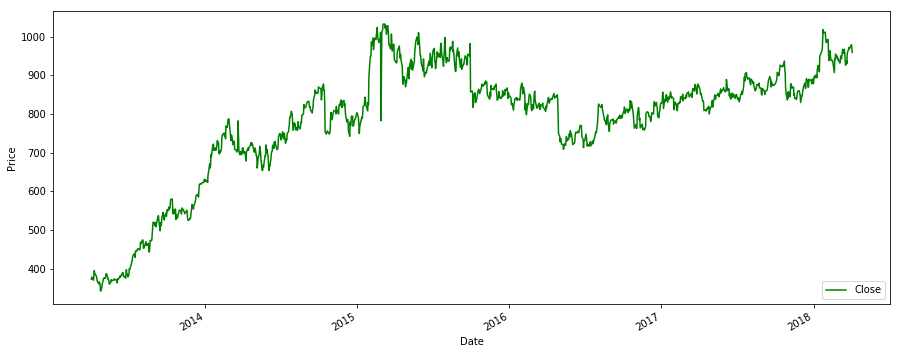

In [18]:
df['Close'].plot(figsize=(15,6), color="green")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [19]:
df.tail()

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close
Date,,,,,,,,,
2018-03-27,975.000000,978.900024,954.500000,972.049988,1247600.0,0.000256,-0.000030,0.0,972.049988
2018-03-28,961.549988,981.599976,955.049988,968.599976,2310086.0,0.000278,0.000073,0.0,968.599976
2018-04-02,968.599976,984.900024,964.799988,979.500000,647823.0,0.000208,0.000113,0.0,979.500000
2018-04-03,972.500000,989.000000,963.049988,969.250000,1018000.0,0.000269,-0.000033,0.0,969.250000
2018-04-04,981.000000,981.250000,949.500000,959.250000,902390.0,0.000334,-0.000222,0.0,959.250000


In [20]:
forecast_col = 'Close'

forecast_out = int(42)
# We will drop 12 columns because there are 12 holidays

In [21]:
df['label'] = df[forecast_col].shift(-forecast_out)
print(df.head(2))

                  Open        High         Low   Adj Close     Volume  \
Date                                                                    
2013-04-04  387.450012  388.299988  369.649994  330.662018  3285122.0   
2013-04-05  371.125000  382.399994  371.125000  335.740631  2671716.0   

              HL_PCT  PCT_CHNG_OpCl  PCT_CHNG_CLOSE       Close       label  
Date                                                                         
2013-04-04  0.000505      -0.000379        0.001273  372.750000  373.825012  
2013-04-05  0.000304       0.000198        0.001273  378.475006  372.100006  


In [22]:
X = np.array(df.drop(['label'], 1))

In [23]:
X = preprocessing.scale(X)

In [24]:
X_forecast_out = X[-forecast_out:]
X = X[:-forecast_out]

In [25]:
y = np.array(df['label'])
y = y[:-forecast_out]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [27]:
clf = LinearRegression()
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
print("Accuracy of our prediction model",clf.score(X_test, y_test)*100,"%")

Accuracy of our prediction model 82.26404129828342 %


In [29]:
# Taking first 30 values since 12 days are holidays

forecast_prediction = clf.predict(X_forecast_out)
print(forecast_prediction[:30])

[944.86892663 946.88754128 933.27541384 943.11185894 920.86804565
 936.18733521 911.03477326 944.06504699 926.75883688 909.38660693
 912.00609738 906.58810937 927.31695726 891.34896313 912.0866712
 897.04679064 908.08156143 916.20929232 911.2735567  909.33139117
 904.41099646 919.78263096 907.52552678 902.65787674 906.52889258
 912.34325712 915.62462478 932.93418729 912.69464541 920.69870662]


In [30]:
df['forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_prediction:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

In [31]:
df

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
Date,,,,,,,,,,,
2013-04-04 00:00:00,387.450012,388.299988,369.649994,330.662018,3285122.0,0.000505,-0.000379,0.001273,372.750000,373.825012,NaN
2013-04-05 00:00:00,371.125000,382.399994,371.125000,335.740631,2671716.0,0.000304,0.000198,0.001273,378.475006,372.100006,NaN
2013-04-08 00:00:00,378.475006,383.500000,370.549988,330.595459,1505430.0,0.000349,-0.000153,0.001273,372.674988,376.725006,NaN
2013-04-09 00:00:00,375.625000,377.399994,369.299988,328.444275,2253782.0,0.000219,-0.000143,0.001273,370.250000,377.850006,NaN
2013-04-10 00:00:00,371.000000,385.875000,368.250000,339.311157,1898240.0,0.000479,0.000310,0.001273,382.500000,381.825012,NaN
2013-04-11 00:00:00,384.899994,396.850006,383.500000,350.710175,2612044.0,0.000348,0.000271,0.001273,395.350006,378.774994,NaN
2013-04-12 00:00:00,379.500000,390.649994,379.375000,344.234406,4798608.0,0.000297,0.000225,0.001273,388.049988,381.850006,NaN
2013-04-15 00:00:00,387.500000,392.000000,381.625000,339.288910,4912316.0,0.000272,-0.000130,0.001273,382.475006,388.149994,NaN
2013-04-16 00:00:00,379.950012,385.225006,378.850006,338.335327,3669770.0,0.000168,0.000038,0.001273,381.399994,389.899994,NaN


In [32]:
pred=df[-42:]

In [33]:
df=df[:-42]

In [34]:
pred

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
Date,,,,,,,,,,,
2018-04-05 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,944.868927
2018-04-06 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,946.887541
2018-04-07 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,933.275414
2018-04-08 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,943.111859
2018-04-09 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,920.868046
2018-04-10 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,936.187335
2018-04-11 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,911.034773
2018-04-12 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,944.065047
2018-04-13 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,926.758837


In [35]:
pred=pred.reset_index()

In [36]:
pred['Date']=pred['Date'].dt.date

In [37]:
pred.head(1)

,Date,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
0,2018-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,944.868927


In [38]:
holidays=['2018-04-07','2018-04-08','2018-04-14','2018-04-15','2018-04-21','2018-04-22','2018-04-28','2018-04-29','2018-05-01','2018-05-05','2018-05-06','2018-05-12','2018-05-13']

In [39]:
pred['Date']=pred['Date'].apply(str)

In [40]:
for i in holidays:
    pred = pred.drop(pred[pred.Date==i].index)

In [41]:
pred['Date']=pd.to_datetime(pred['Date'])

In [42]:
pred.drop('forecast',axis=1,inplace=True)

In [43]:
pred.shape

(29, 11)

In [44]:
pred['forecast']=forecast_prediction[:29]

In [45]:
pred

,Date,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
0,2018-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,944.868927
1,2018-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,946.887541
4,2018-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,933.275414
5,2018-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,943.111859
6,2018-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,920.868046
7,2018-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,936.187335
8,2018-04-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,911.034773
11,2018-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,944.065047
12,2018-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,926.758837
13,2018-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,909.386607


In [46]:
pred.index=pred['Date']
pred.drop('Date',axis=1,inplace=True)

In [47]:
df=df.append(pred)

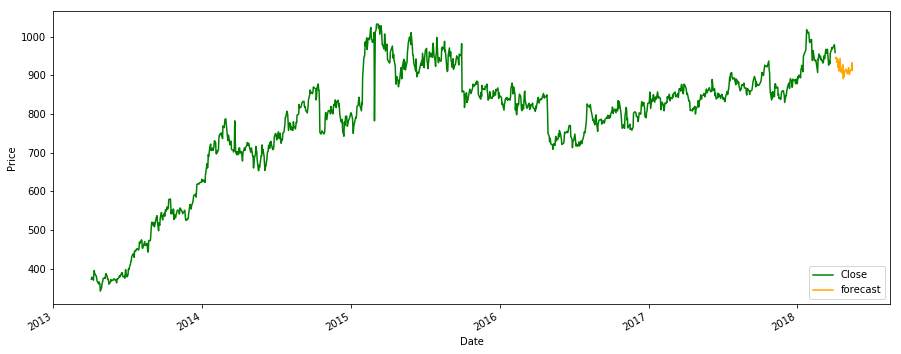

In [48]:
df['Close'].plot(figsize=(15,6), color="green")
df['forecast'].plot(figsize=(15,6), color="orange")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

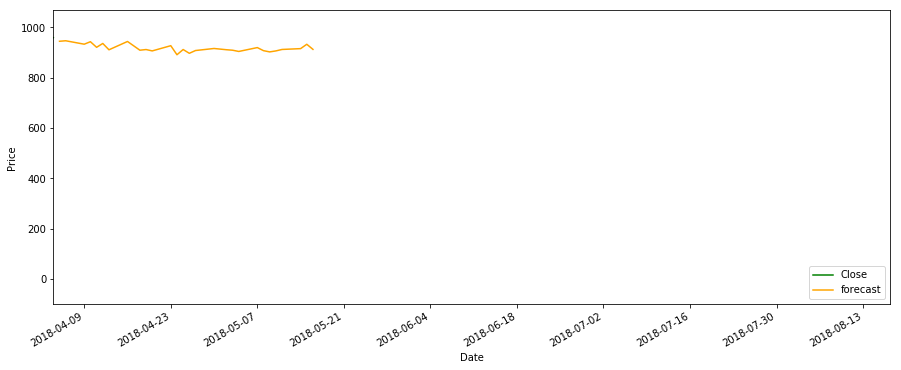

In [49]:
df['Close'].plot(figsize=(15,6), color="green")
df['forecast'].plot(figsize=(15,6), color="orange")
plt.xlim(xmin=datetime.date(2018, 4, 4))
plt.ylim(ymin=-100)
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [50]:
df.iloc[-1]

Open                     NaN
High                     NaN
Low                      NaN
Adj Close                NaN
Volume                   NaN
HL_PCT                   NaN
PCT_CHNG_OpCl            NaN
PCT_CHNG_CLOSE           NaN
Close                    NaN
label                    NaN
forecast          912.694645
Name: 2018-05-16 00:00:00, dtype: float64

In [51]:
close_last=df.iloc[-1].forecast

In [52]:
pred_return=close_last-close_zero
print("Predicted Return: Rs.",pred_return)

Predicted Return: Rs. -46.55535458727809


## Simple Moving Average (30,40,50)

In [53]:
# For 30 days
short_rolling = df.rolling(window=30).mean()
short_rolling.head(30)

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
Date,,,,,,,,,,,
2013-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# For 40 days
med_rolling = df.rolling(window=40).mean()
med_rolling.tail(10)

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
Date,,,,,,,,,,,
2018-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# For 50 days
long_rolling = df.rolling(window=50).mean()
long_rolling.tail(10)

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
Date,,,,,,,,,,,
2018-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0,0.5,'Price in Rs.')

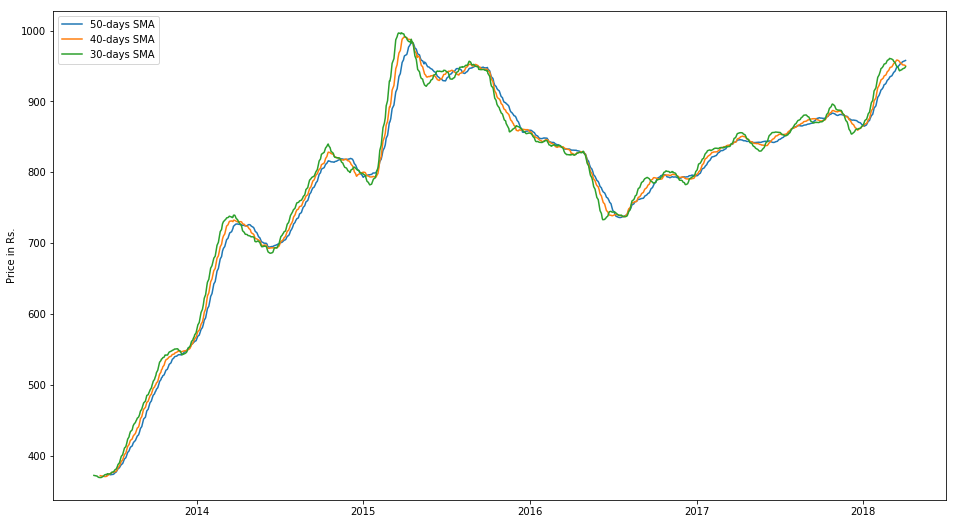

In [56]:
start_date = '2013-04-29'
end_date = '2018-04-04'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'Close'], label = '50-days SMA')
ax.plot(med_rolling.loc[start_date:end_date, :].index, med_rolling.loc[start_date:end_date, 'Close'], label = '40-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Close'], label = '30-days SMA')


ax.legend(loc='best')
ax.set_ylabel('Price in Rs.')


## Exponential Moving Average (30,40,50)

Text(0,0.5,'Price in Rs.')

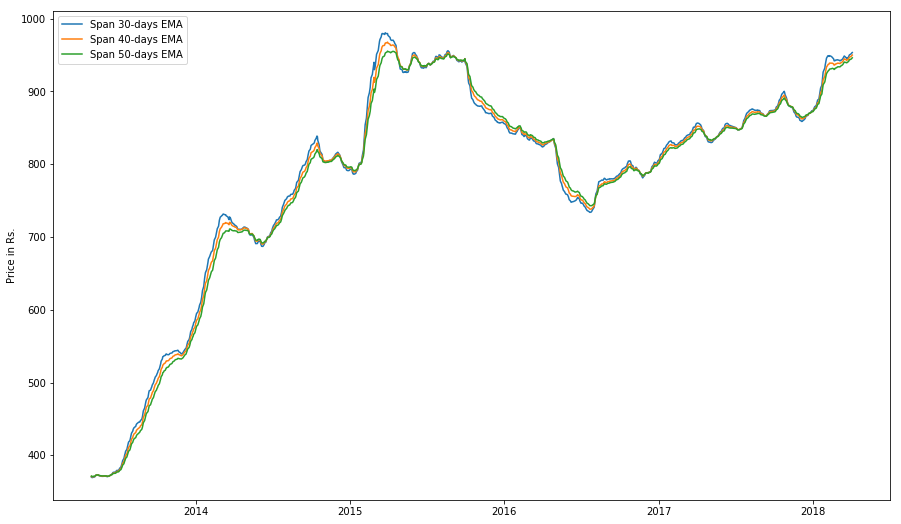

In [57]:
ema_short = df.ewm(span=30, adjust=False).mean()
ema_med = df.ewm(span=40, adjust=False).mean()
ema_long = df.ewm(span=50, adjust=False).mean()

fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'Close'], label = 'Span 30-days EMA')
ax.plot(ema_med.loc[start_date:end_date, :].index, ema_med.loc[start_date:end_date, 'Close'], label = 'Span 40-days EMA')
ax.plot(ema_long.loc[start_date:end_date, :].index, ema_long.loc[start_date:end_date, 'Close'], label = 'Span 50-days EMA')

ax.legend(loc='best')
ax.set_ylabel('Price in Rs.')

## Aroon Oscillator (30,40,50)

In [58]:
from pandas.stats import moments
from pandas import DataFrame

In [59]:
def aroon(s, n):
    up = 100 * moments.rolling_apply(s.High, n + 1, lambda x: x.argmax()) / n
    dn = 100 * moments.rolling_apply(s.Low, n + 1, lambda x: x.argmin()) / n

    return DataFrame(dict(up=up, down=dn))

In [60]:
ao30=aroon(df,30)
ao40=aroon(df,40)
ao50=aroon(df,50)

In [61]:
ao30

,down,up
Date,,
2013-04-04,NaN,NaN
2013-04-05,NaN,NaN
2013-04-08,NaN,NaN
2013-04-09,NaN,NaN
2013-04-10,NaN,NaN
2013-04-11,NaN,NaN
2013-04-12,NaN,NaN
2013-04-15,NaN,NaN
2013-04-16,NaN,NaN


Text(0,0.5,'Change in Price in Rs.')

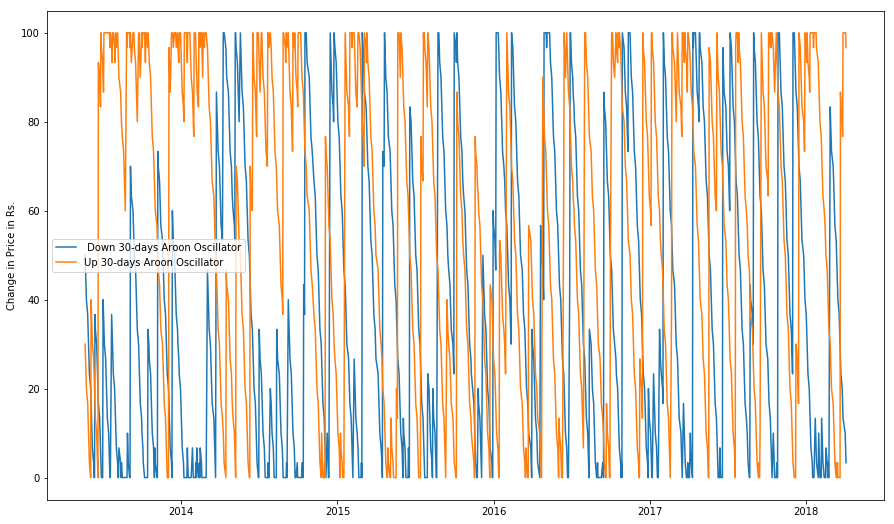

In [62]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ao30.loc[start_date:end_date, :].index, ao30.loc[start_date:end_date, 'down'], label = ' Down 30-days Aroon Oscillator')
ax.plot(ao30.loc[start_date:end_date, :].index, ao30.loc[start_date:end_date, 'up'], label = 'Up 30-days Aroon Oscillator')


ax.legend(loc='best')
ax.set_ylabel('Change in Price in Rs.')

Text(0,0.5,'Change in Price in Rs.')

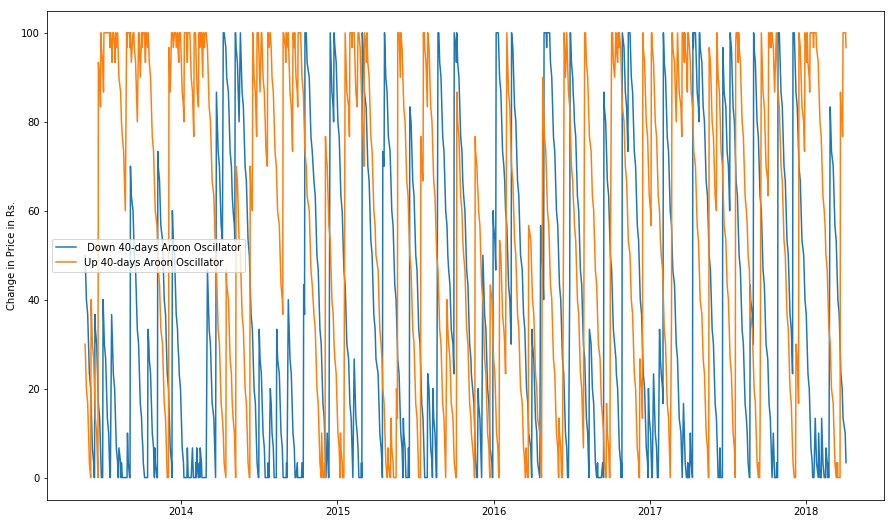

In [63]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ao30.loc[start_date:end_date, :].index, ao30.loc[start_date:end_date, 'down'], label = ' Down 40-days Aroon Oscillator')
ax.plot(ao30.loc[start_date:end_date, :].index, ao30.loc[start_date:end_date, 'up'], label = 'Up 40-days Aroon Oscillator')


ax.legend(loc='best')
ax.set_ylabel('Change in Price in Rs.')

Text(0,0.5,'Change in Price in Rs.')

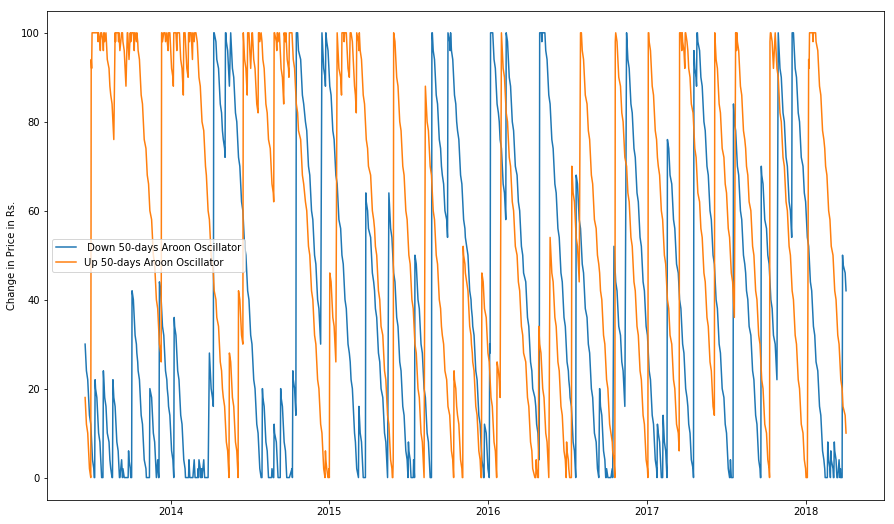

In [64]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ao50.loc[start_date:end_date, :].index, ao50.loc[start_date:end_date, 'down'], label = ' Down 50-days Aroon Oscillator')
ax.plot(ao50.loc[start_date:end_date, :].index, ao50.loc[start_date:end_date, 'up'], label = 'Up 50-days Aroon Oscillator')


ax.legend(loc='best')
ax.set_ylabel('Change in Price in Rs.')

## MACD Signal

In [65]:
def ema(s, n, wilder=False):
    span = n if not wilder else 2*n - 1
    return moments.ewma(s, span=span)


def macd(s, nfast=12, nslow=26, nsig=9, percent=True):
    fast, slow = ema(s, nfast), ema(s, nslow)

    if percent:
        macd = 100*(fast / slow - 1)
    else:
        macd = fast - slow

    sig = ema(macd, nsig)
    hist = macd - sig

    return DataFrame(dict(macd=macd, signal=sig, hist=hist,
                          fast=fast, slow=slow))

In [66]:
m=macd(df['Close'])

In [67]:
m.head(1)

,fast,hist,macd,signal,slow
Date,,,,,
2013-04-04,372.75,0.0,0.0,0.0,372.75


Text(0,0.5,'Change ')

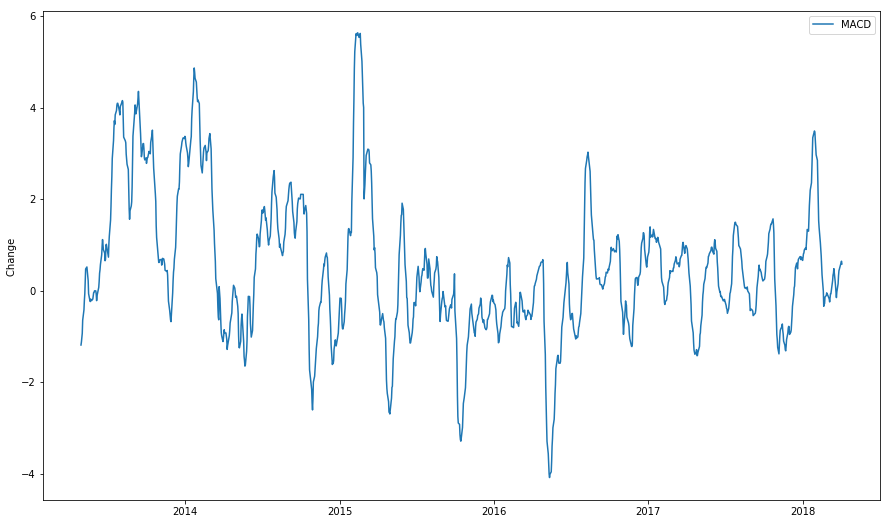

In [68]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(m.loc[start_date:end_date, :].index, m.loc[start_date:end_date, 'macd'], label = 'MACD')

ax.legend(loc='best')
ax.set_ylabel('Change ')

## Relative Strength Index (RSI)

In [69]:
def rsi(s, n=14):
    diff = s.diff()
    which_dn = diff < 0

    up, dn = diff, diff*0
    up[which_dn], dn[which_dn] = 0, -up[which_dn]

    emaup = ema(up, n, wilder=True)
    emadn = ema(dn, n, wilder=True)

    return 100 * emaup/(emaup + emadn)

In [70]:
sf=rsi(df['Close'],50)

In [71]:
sfd=pd.DataFrame({'Date':sf.index, 'RSI':sf.values})

In [72]:
sfd.index=sfd['Date']

Text(0,0.5,'Change')

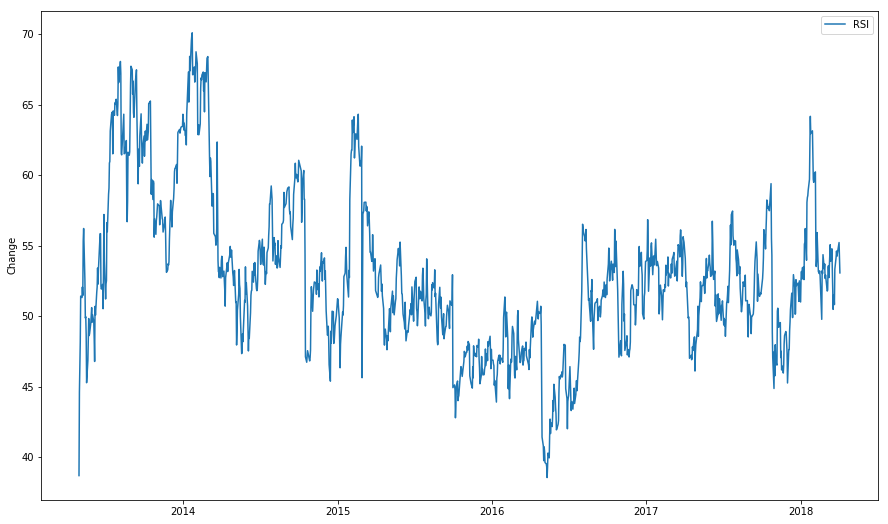

In [73]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(sfd.loc[start_date:end_date, :].index, sfd.loc[start_date:end_date, 'RSI'], label = 'RSI')

ax.legend(loc='best')
ax.set_ylabel('Change')

## Bollinger Bands (30,40,50)

In [74]:
price=df["Close"]

def bbands(price, length=30, numsd=2):
    """ returns average, upper band, and lower band"""
    ave = pd.stats.moments.rolling_mean(price,length)
    sd = pd.stats.moments.rolling_std(price,length)
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)

df['ave30'], df['upper30'], df['lower30'] = bbands(df.Close, length=30, numsd=1)
df['ave40'], df['upper40'], df['lower40'] = bbands(df.Close, length=40, numsd=1)
df['ave50'], df['upper50'], df['lower50'] = bbands(df.Close, length=50, numsd=1)

Text(0,0.5,'Change')

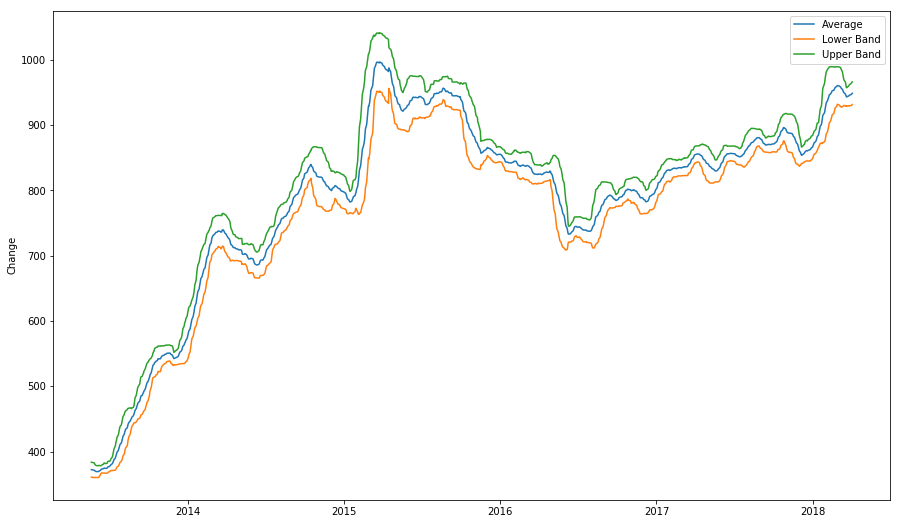

In [75]:
# For 30 days
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'ave30'], label = 'Average')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'lower30'], label = 'Lower Band')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'upper30'], label = 'Upper Band')

ax.legend(loc='best')
ax.set_ylabel('Change')

Text(0,0.5,'Change')

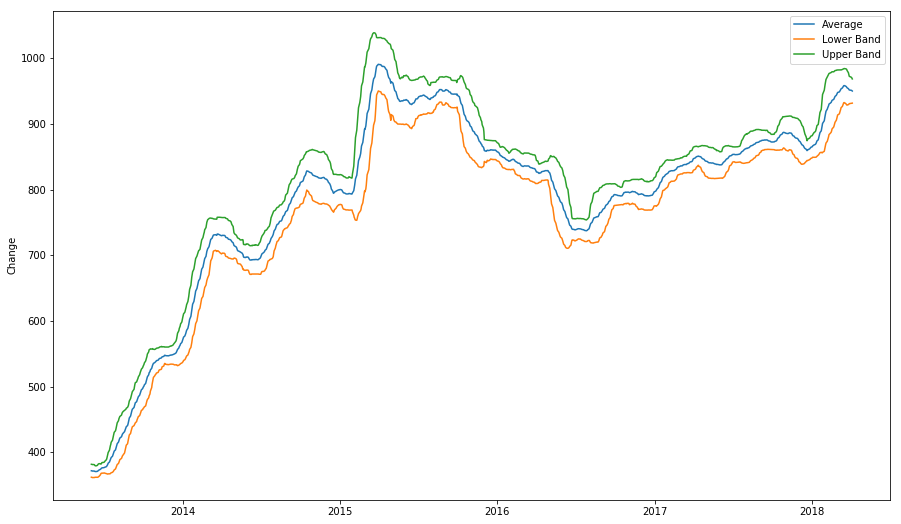

In [76]:
# For 40 days
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'ave40'], label = 'Average')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'lower40'], label = 'Lower Band')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'upper40'], label = 'Upper Band')

ax.legend(loc='best')
ax.set_ylabel('Change')

Text(0,0.5,'Change')

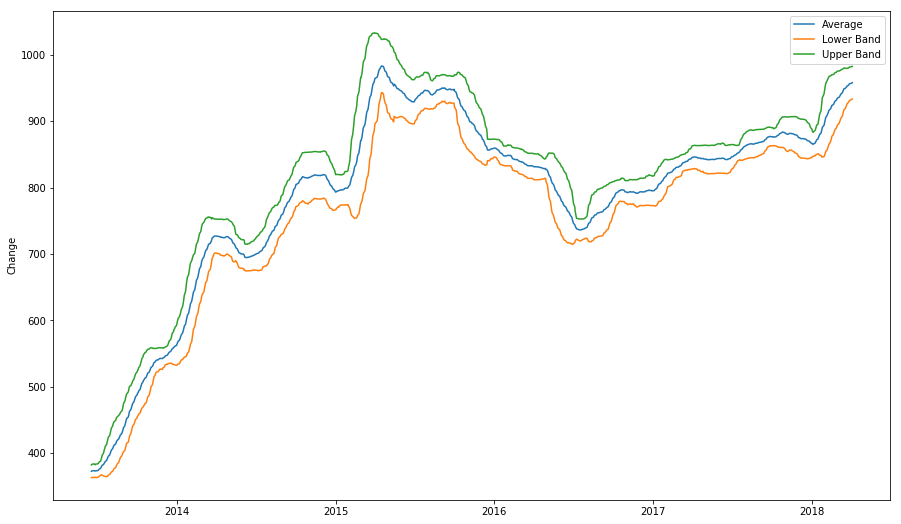

In [77]:
# For 50 days
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'ave50'], label = 'Average')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'lower50'], label = 'Lower Band')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'upper50'], label = 'Upper Band')

ax.legend(loc='best')
ax.set_ylabel('Change')

## Stochastic Oscillator

In [78]:
def STOK(close, low, high, n): 
 STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100
 return STOK

def STOD(close, low, high, n):
 STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100
 STOD = pd.rolling_mean(STOK, 3)
 return STOD

In [79]:
df['%K'] = STOK(df['Close'], df['Low'], df['High'], 14)
df['%D'] = STOD(df['Close'], df['Low'], df['High'], 14)

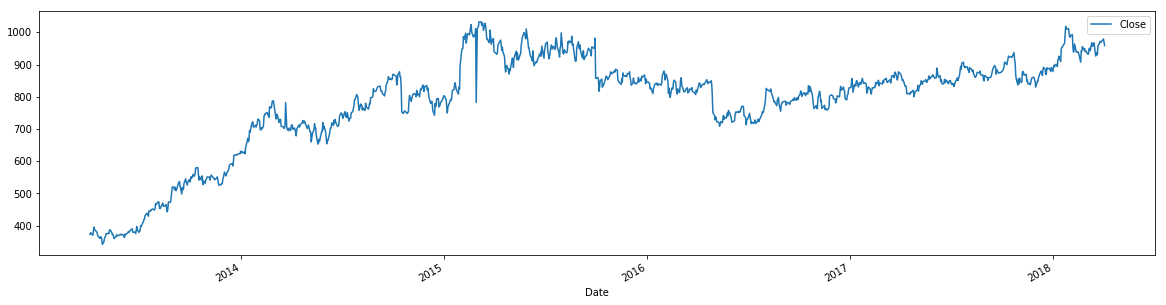

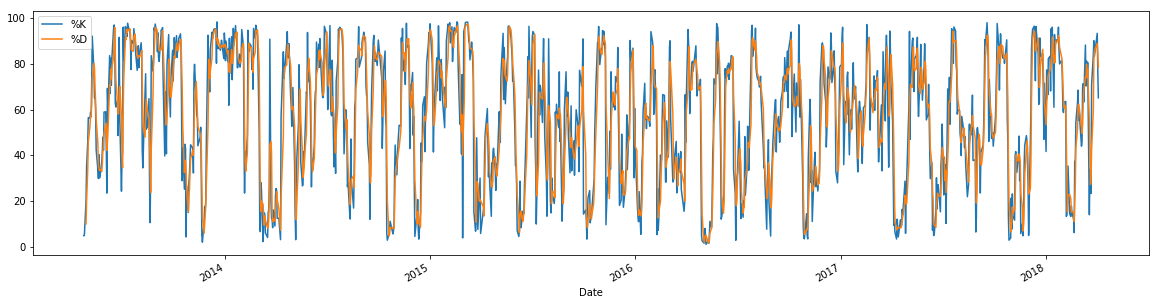

In [80]:
df.plot(y=['Close'], figsize = (20, 5))
df.plot(y=['%K', '%D'], figsize = (20, 5))

## Chande Oscillator

In [81]:
def avg_true_range(df): 
  ind = range(0,len(df))
  indexlist = list(ind)
  df.index = indexlist

  for index, row in df.iterrows():
    if index != 0:
      tr1 = row["High"] - row["Low"]
      tr2 = abs(row["High"] - df.iloc[index-1]["Close"])
      tr3 = abs(row["Low"] - df.iloc[index-1]["Close"])

      true_range = max(tr1, tr2, tr3)
      df.set_value(index,"True Range", true_range)

  df["Avg TR"] = df["True Range"].rolling(min_periods=14, window=14, center=False).mean()
  return df

In [82]:
def chandelier_exit(df):

  df_tr = avg_true_range(df)

  df_tr['rolling_high']= df_tr["High"]
  df_tr['rolling_low'] = df_tr["Low"]

  df_tr['chandelier_long'] = df_tr['rolling_high'] - df_tr["Avg TR"] * 3
  df_tr['chandelier_short'] = df_tr['rolling_low'] - df_tr["Avg TR"] * 3
  fig, ax = plt.subplots(figsize=(15,9))

  ax.plot(df_tr['Date'], df_tr['chandelier_long'], label = 'Chand Long')

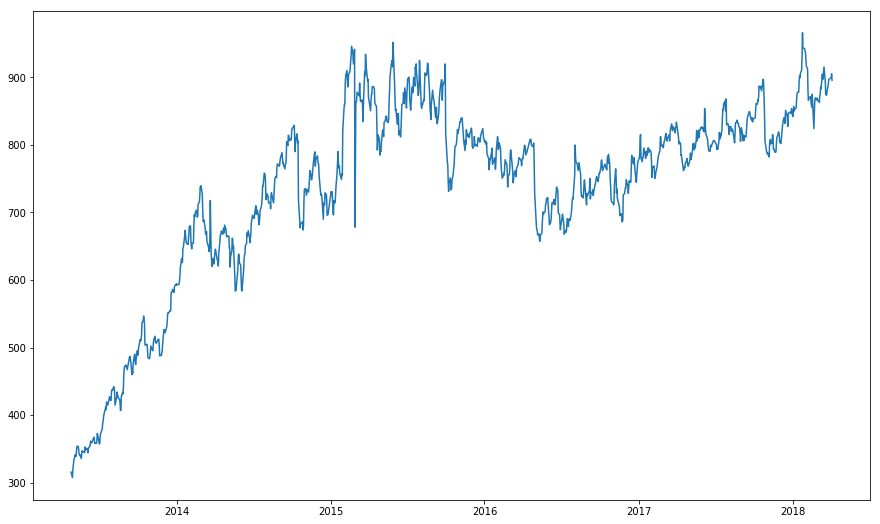

In [83]:
ch=chandelier_exit(df1)

## Commodity Channel Index (30,40,50)

In [84]:
def CCI(data, ndays): 
 TP = (data['High'] + data['Low'] + data['Close']) / 3 
 CCI = pd.Series((TP - pd.rolling_mean(TP, ndays)) / (0.015 * pd.rolling_std(TP, ndays)),
 name = 'CCI')
 data=data.join(CCI)
 return data

In [85]:
cci30=CCI(df,30)
cci40=CCI(df,40)
cci50=CCI(df,50)

In [86]:
cci30

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,...,lower30,ave40,upper40,lower40,ave50,upper50,lower50,%K,%D,CCI
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-04,387.450012,388.299988,369.649994,330.662018,3285122.0,0.000505,-0.000379,0.001273,372.750000,373.825012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-05,371.125000,382.399994,371.125000,335.740631,2671716.0,0.000304,0.000198,0.001273,378.475006,372.100006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-08,378.475006,383.500000,370.549988,330.595459,1505430.0,0.000349,-0.000153,0.001273,372.674988,376.725006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-09,375.625000,377.399994,369.299988,328.444275,2253782.0,0.000219,-0.000143,0.001273,370.250000,377.850006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-10,371.000000,385.875000,368.250000,339.311157,1898240.0,0.000479,0.000310,0.001273,382.500000,381.825012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-11,384.899994,396.850006,383.500000,350.710175,2612044.0,0.000348,0.000271,0.001273,395.350006,378.774994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-12,379.500000,390.649994,379.375000,344.234406,4798608.0,0.000297,0.000225,0.001273,388.049988,381.850006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-15,387.500000,392.000000,381.625000,339.288910,4912316.0,0.000272,-0.000130,0.001273,382.475006,388.149994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-16,379.950012,385.225006,378.850006,338.335327,3669770.0,0.000168,0.000038,0.001273,381.399994,389.899994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0,0.5,'Change')

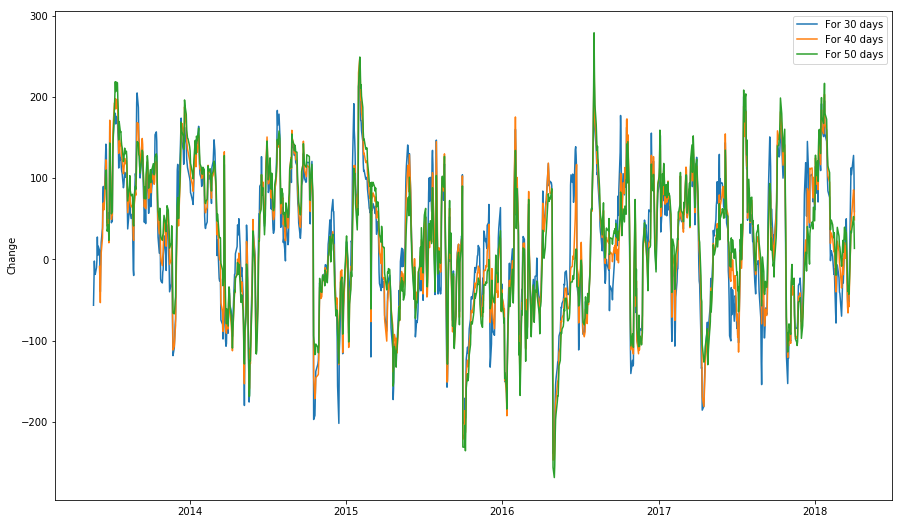

In [87]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(cci30.loc[start_date:end_date, :].index, cci30.loc[start_date:end_date, 'CCI'], label = 'For 30 days')
ax.plot(cci40.loc[start_date:end_date, :].index, cci40.loc[start_date:end_date, 'CCI'], label = 'For 40 days')
ax.plot(cci50.loc[start_date:end_date, :].index, cci50.loc[start_date:end_date, 'CCI'], label = 'For 50 days')

ax.legend(loc='best')
ax.set_ylabel('Change')

## Chakin Volatility Indicator (30,40,50)

In [88]:
def chaikin_oscillator(data, periods_short=3, periods_long=30, high_col='High',
                       low_col='Low', close_col='Close', vol_col='Volume'):
    ac = pd.Series([])

    for index, row in data.iterrows():
        if row[high_col] != row[low_col]:
            val = ((row[close_col] - row[low_col]) - (row[high_col] - row[close_col])) / (row[high_col] - row[low_col]) * row[vol_col]
        else:
            val = 0
        ac.set_value(index, val)

    ema_long = ac.ewm(ignore_na=False, min_periods=0, com=periods_long, adjust=True).mean()
    ema_short = ac.ewm(ignore_na=False, min_periods=0, com=periods_short, adjust=True).mean()
    data['ch_osc'] = ema_short - ema_long

    return data

In [89]:
ch30=chaikin_oscillator(df,3,30)
ch40=chaikin_oscillator(df,3,40)
ch50=chaikin_oscillator(df,3,50)

Text(0,0.5,'Change')

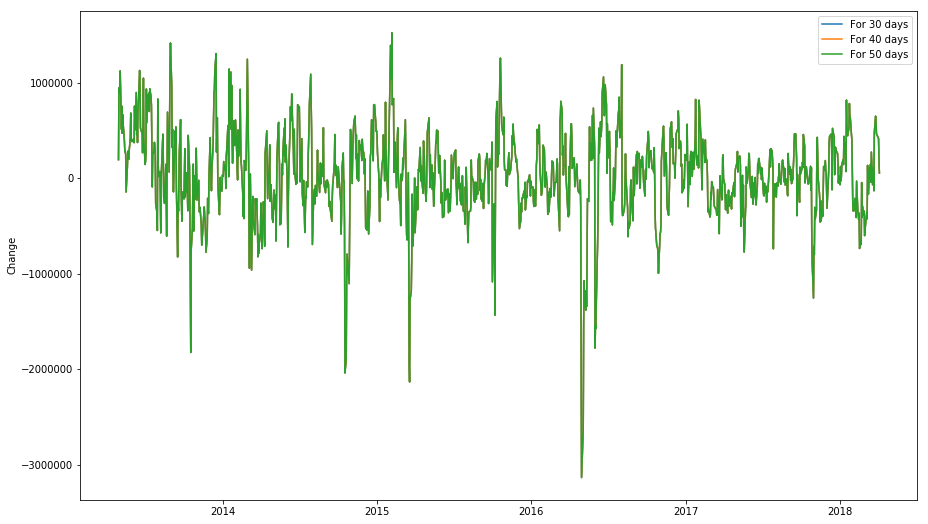

In [90]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ch30.loc[start_date:end_date, :].index, ch30.loc[start_date:end_date, 'ch_osc'], label = 'For 30 days')
ax.plot(ch40.loc[start_date:end_date, :].index, ch40.loc[start_date:end_date, 'ch_osc'], label = 'For 40 days')
ax.plot(ch50.loc[start_date:end_date, :].index, ch50.loc[start_date:end_date, 'ch_osc'], label = 'For 50 days')

ax.legend(loc='best')
ax.set_ylabel('Change')

#overlapped each other

## Rate of Price Change (30,40,50)

In [91]:
def ROC(data,n):
 N = data['Close'].diff(n)
 D = data['Close'].shift(n)
 ROC = pd.Series(N/D,name='ROC')
 data = data.join(ROC)
 return data 

In [92]:
roc30=ROC(df,30)
roc40=ROC(df,40)
roc50=ROC(df,50)

In [93]:
roc30

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,...,ave40,upper40,lower40,ave50,upper50,lower50,%K,%D,ch_osc,ROC
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-04,387.450012,388.299988,369.649994,330.662018,3285122.0,0.000505,-0.000379,0.001273,372.750000,373.825012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN
2013-04-05,371.125000,382.399994,371.125000,335.740631,2671716.0,0.000304,0.000198,0.001273,378.475006,372.100006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.997404e+05,NaN
2013-04-08,378.475006,383.500000,370.549988,330.595459,1505430.0,0.000349,-0.000153,0.001273,372.674988,376.725006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.233715e+04,NaN
2013-04-09,375.625000,377.399994,369.299988,328.444275,2253782.0,0.000219,-0.000143,0.001273,370.250000,377.850006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.900152e+04,NaN
2013-04-10,371.000000,385.875000,368.250000,339.311157,1898240.0,0.000479,0.000310,0.001273,382.500000,381.825012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.308243e+05,NaN
2013-04-11,384.899994,396.850006,383.500000,350.710175,2612044.0,0.000348,0.000271,0.001273,395.350006,378.774994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.960029e+05,NaN
2013-04-12,379.500000,390.649994,379.375000,344.234406,4798608.0,0.000297,0.000225,0.001273,388.049988,381.850006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.233613e+05,NaN
2013-04-15,387.500000,392.000000,381.625000,339.288910,4912316.0,0.000272,-0.000130,0.001273,382.475006,388.149994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.109513e+05,NaN
2013-04-16,379.950012,385.225006,378.850006,338.335327,3669770.0,0.000168,0.000038,0.001273,381.399994,389.899994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.465555e+05,NaN


Text(0,0.5,'Change')

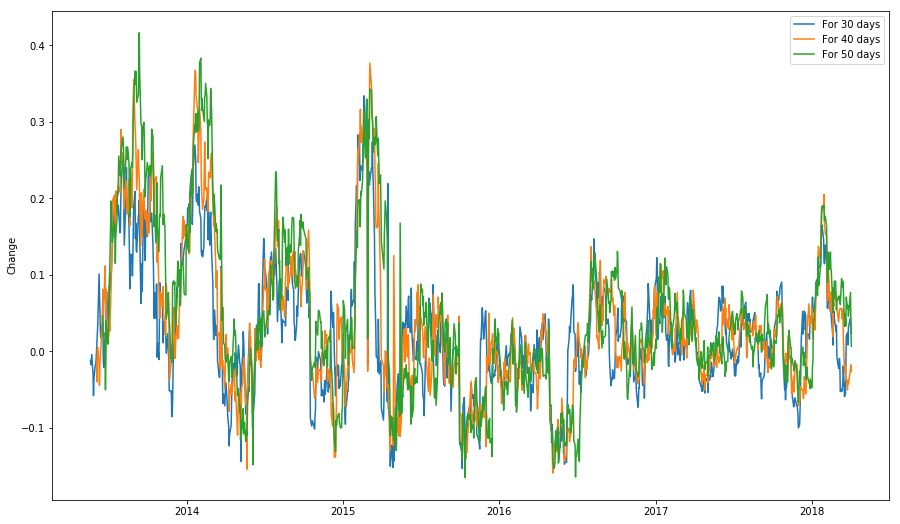

In [94]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(roc30.loc[start_date:end_date, :].index, roc30.loc[start_date:end_date, 'ROC'], label = 'For 30 days')
ax.plot(roc40.loc[start_date:end_date, :].index, roc40.loc[start_date:end_date, 'ROC'], label = 'For 40 days')
ax.plot(roc50.loc[start_date:end_date, :].index, roc50.loc[start_date:end_date, 'ROC'], label = 'For 50 days')

ax.legend(loc='best')
ax.set_ylabel('Change')

## Rate of Volume Change (30,40,50)


In [95]:
def ROC(data,n):
 N = data['Volume'].diff(n)
 D = data['Volume'].shift(n)
 ROC = pd.Series(N/D,name='ROC')
 data = data.join(ROC)
 return data 

In [96]:
roc30=ROC(df,30)
roc40=ROC(df,40)
roc50=ROC(df,50)

In [97]:
roc30

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,...,ave40,upper40,lower40,ave50,upper50,lower50,%K,%D,ch_osc,ROC
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-04,387.450012,388.299988,369.649994,330.662018,3285122.0,0.000505,-0.000379,0.001273,372.750000,373.825012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN
2013-04-05,371.125000,382.399994,371.125000,335.740631,2671716.0,0.000304,0.000198,0.001273,378.475006,372.100006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.997404e+05,NaN
2013-04-08,378.475006,383.500000,370.549988,330.595459,1505430.0,0.000349,-0.000153,0.001273,372.674988,376.725006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.233715e+04,NaN
2013-04-09,375.625000,377.399994,369.299988,328.444275,2253782.0,0.000219,-0.000143,0.001273,370.250000,377.850006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.900152e+04,NaN
2013-04-10,371.000000,385.875000,368.250000,339.311157,1898240.0,0.000479,0.000310,0.001273,382.500000,381.825012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.308243e+05,NaN
2013-04-11,384.899994,396.850006,383.500000,350.710175,2612044.0,0.000348,0.000271,0.001273,395.350006,378.774994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.960029e+05,NaN
2013-04-12,379.500000,390.649994,379.375000,344.234406,4798608.0,0.000297,0.000225,0.001273,388.049988,381.850006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.233613e+05,NaN
2013-04-15,387.500000,392.000000,381.625000,339.288910,4912316.0,0.000272,-0.000130,0.001273,382.475006,388.149994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.109513e+05,NaN
2013-04-16,379.950012,385.225006,378.850006,338.335327,3669770.0,0.000168,0.000038,0.001273,381.399994,389.899994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.465555e+05,NaN


Text(0,0.5,'Change')

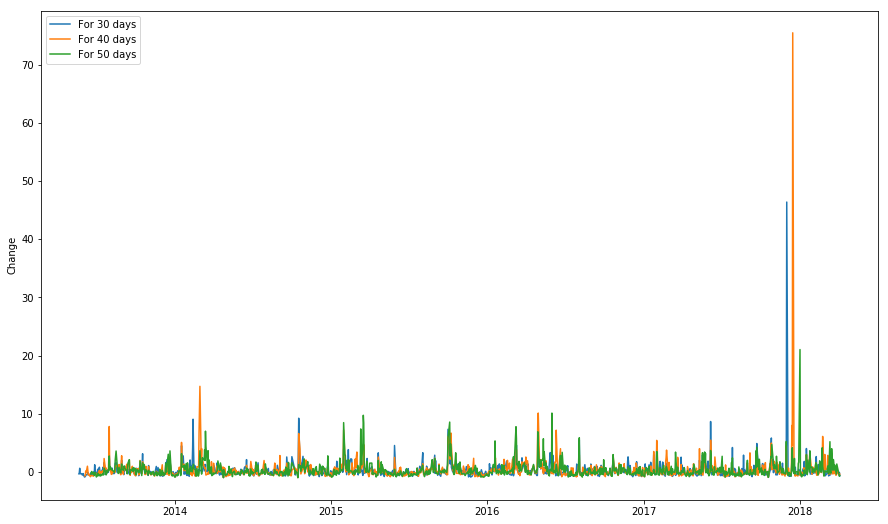

In [98]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(roc30.loc[start_date:end_date, :].index, roc30.loc[start_date:end_date, 'ROC'], label = 'For 30 days')
ax.plot(roc40.loc[start_date:end_date, :].index, roc40.loc[start_date:end_date, 'ROC'], label = 'For 40 days')
ax.plot(roc50.loc[start_date:end_date, :].index, roc50.loc[start_date:end_date, 'ROC'], label = 'For 50 days')

ax.legend(loc='best')
ax.set_ylabel('Change')